# Import libraries

In [21]:
# library for data analysis
import pandas as pd

# library to clean (pre-porcess data)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

# library to create model (classification algorithm)
from sklearn.ensemble import RandomForestClassifier

# library to evaluate models
from sklearn.metrics import  classification_report, accuracy_score



# Collect data

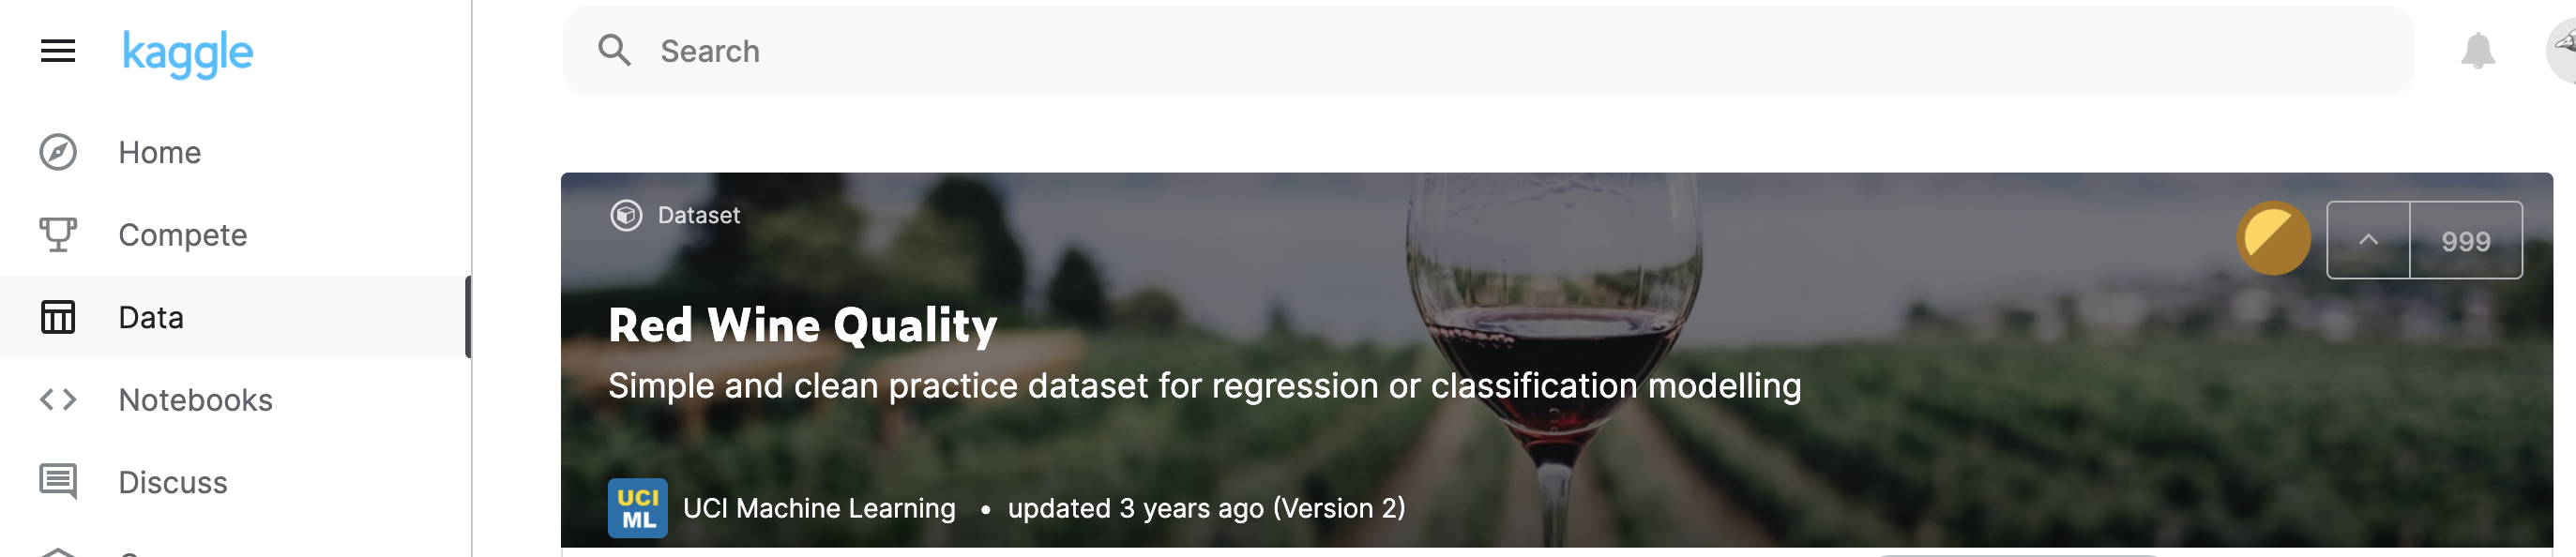

In [29]:
from IPython.display import Image

Image(filename='kaggle.png') 

In [26]:
wine = pd.read_csv('winequality-red.csv')


# Analyze

In [27]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
# The quality of a wine is based on a note from 3 to 7

wine.quality.value_counts()


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
# Get information about the data 

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Clean data 

In [7]:
# Make quality colum just good or bad wines 
# More than 6.5 is a good wine

new_bins = (2, 6.5, 8) # 2 bins , split at 6,5 and goes until 8
category =['BAD','GOOD']

wine['quality']= pd.cut(wine['quality'], bins= new_bins, labels = category)
wine['quality'].unique()

['BAD', 'GOOD']
Categories (2, object): ['BAD' < 'GOOD']

In [8]:
# Make BAD=0  GOOD=1

label_quality = LabelEncoder()

wine['quality']=label_quality.fit_transform(wine['quality'])


<AxesSubplot:xlabel='quality', ylabel='count'>

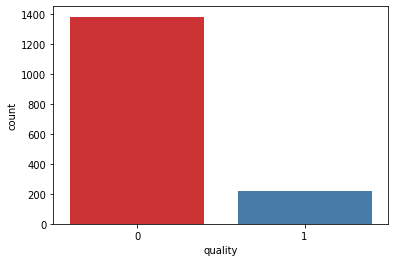

In [22]:
# Visualize how many are good and bad wines

sns.countplot(wine['quality'], palette="Set1")

In [11]:
# Split data into train and test

X = wine.drop('quality', axis=1)
y = wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2)


In [12]:
# Scaling to improve the result

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Create and train the model

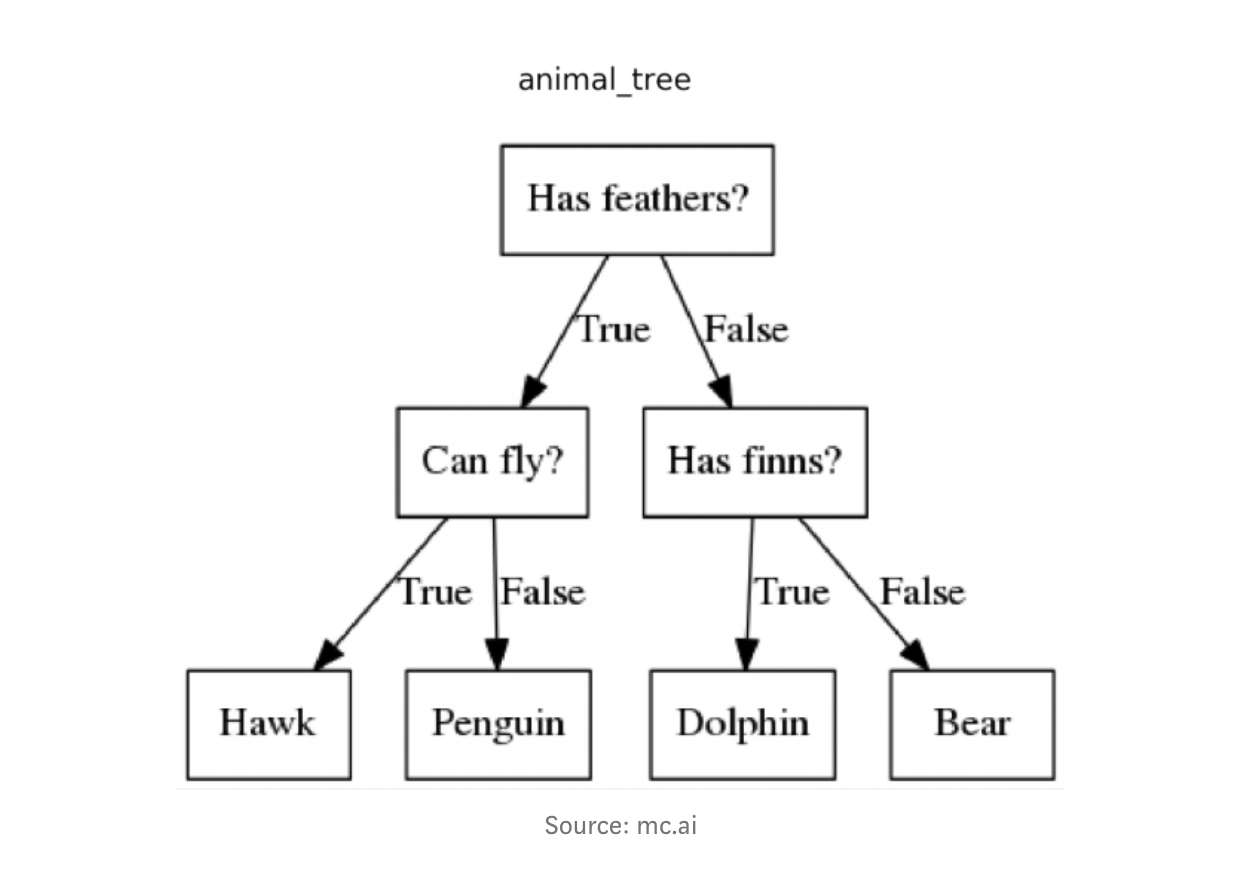

In [13]:
# Select a model : Random Forest Algorithm 
# The forest is based on decision trees 

from IPython.display import Image

Image(filename='tree.png') 

In [18]:
# Random Forest Algorithm,  Good for medium size data 

rfc_model = RandomForestClassifier(n_estimators=200) # 200 trees in the forest

# Fit the model = train the model

rfc_model.fit(X_train,y_train)

# Generate Predictions

pred_rfc = rfc_model.predict(X_test)


# Evaluate the model

In [38]:
# How accurate is our model ? 

print(accuracy_score(y_test,pred_rfc)* 100)


90.9375


In [39]:
# From the first 30 wines in the test dataset, which one are good wines ? 

pred_rfc[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0])

# Apply the best prediction for future wines

In [20]:
# Apply the best prediction for future wines

new_sample = [[11.2,0.28,0.5,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8]]
new_sample = sc.transform(new_sample)
prediction = rfc_model.predict(new_sample)

prediction

# It's a bad wine :(

array([0])